<a href="https://colab.research.google.com/github/ErickArciniega/ProyectoFinalRedesNeuronalesAvanzadas/blob/main/PreprocesamientoProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from skimage import data, filters, exposure, io, color

from PIL import Image,ImageOps, ImageDraw
import pandas as pd
import seaborn as sns

from shutil import rmtree #Limpieza de datos
import os 
import pickle
import datetime

#tensorflow
import tensorflow as tf
%load_ext tensorboard
#sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from skimage import filters, exposure, color
from shutil import rmtree
from google.colab import files

In [2]:
!git clone https://github.com/ErickArciniega/ProyectoFinalRedesNeuronalesAvanzadas.git

Cloning into 'ProyectoFinalRedesNeuronalesAvanzadas'...
remote: Enumerating objects: 1571, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 1571 (delta 9), reused 19 (delta 5), pack-reused 1517
Receiving objects: 100% (1571/1571), 81.20 MiB | 31.64 MiB/s, done.
Resolving deltas: 100% (162/162), done.


In [3]:
%ls

ProyectoFinalRedesNeuronalesAvanzadas/  sample_data/


In [4]:
%cd ProyectoFinalRedesNeuronalesAvanzadas/

/content/ProyectoFinalRedesNeuronalesAvanzadas


In [5]:
#paths declarados de utilidad 
dir = "/content/ProyectoFinalRedesNeuronalesAvanzadas/"
dirData = dir+'data/'
dir

'/content/ProyectoFinalRedesNeuronalesAvanzadas/'

In [6]:
os.listdir()

['LICENSE', 'data', 'README.md', '.gitignore', '.git']

In [9]:
#listado de Tipos de entradas
os.chdir(dirData)
listaDeEntradas = os.listdir()
listaDeEntradas

['ComponentesFotos', 'ComponentesEsquematicos']

In [10]:
#Listado de componentes foto
os.chdir(dirData+'/'+listaDeEntradas[1])
listadoComponentesFoto = os.listdir()

listadoComponentesFoto

['Ventiladores',
 'Conectores',
 'Bocinas',
 'CapacitoresElectroliticos',
 'Potenciometros',
 'Resistencias',
 'Motores',
 'Diodos',
 'Transistores',
 'CapacitorCeramico',
 'PushButton',
 'DipSwitch',
 'Baterias',
 'Circuitos Integrados',
 'LcdDisplay',
 'Fusibles',
 'Led',
 'Bobinas']

In [11]:
#listado de componentes esquematicos
os.chdir(dirData+'/'+listaDeEntradas[1])
listadoComponentesEsquematico = os.listdir()
listadoComponentesEsquematico

['Ventiladores',
 'Conectores',
 'Bocinas',
 'CapacitoresElectroliticos',
 'Potenciometros',
 'Resistencias',
 'Motores',
 'Diodos',
 'Transistores',
 'CapacitorCeramico',
 'PushButton',
 'DipSwitch',
 'Baterias',
 'Circuitos Integrados',
 'LcdDisplay',
 'Fusibles',
 'Led',
 'Bobinas']

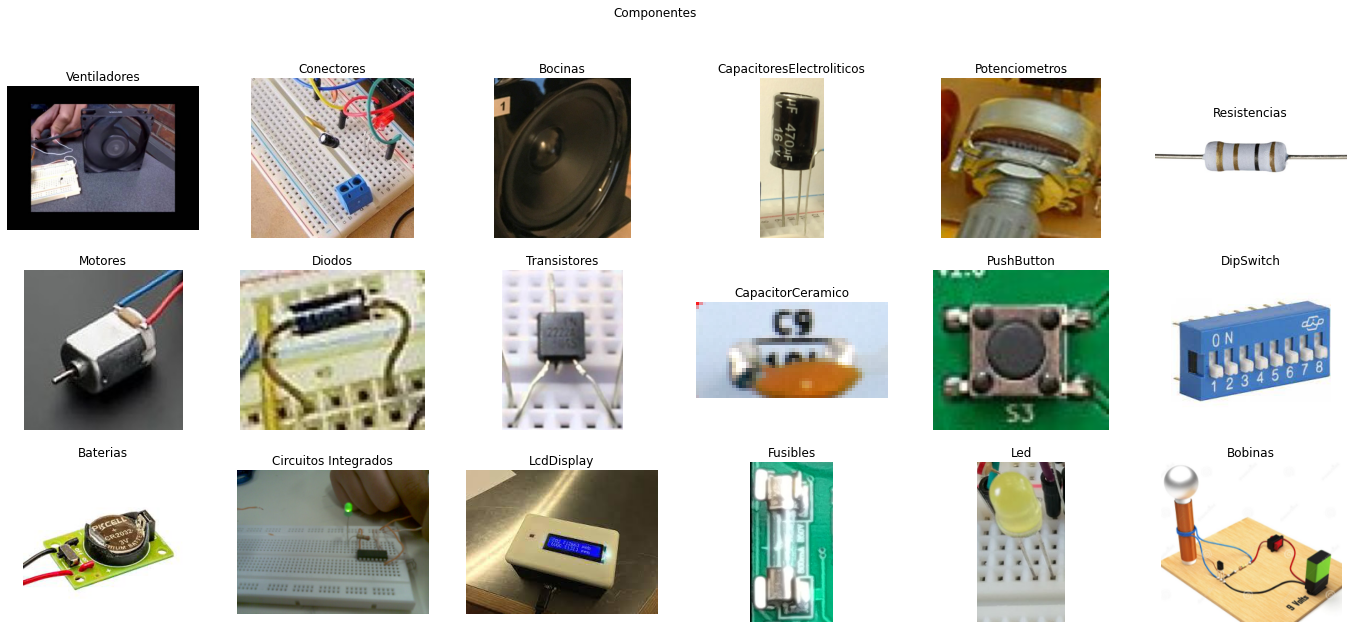

In [12]:
ROWS = 3
COLS = 6
path = 0
amount_images = np.zeros(len(listadoComponentesFoto))

fig, ax = plt.subplots(3, 6, figsize = (24, 10))
for i in range(ROWS):
    for j in range(COLS):
        pics = os.listdir(dirData + 'ComponentesFotos/'+ listadoComponentesFoto[path])
        amount_images[path] = len(pics)
        index = np.random.randint(len(pics))
        ax[i][j].imshow(Image.open(dirData  + 'ComponentesFotos/'+  listadoComponentesFoto[path] + '/' +pics[index]))
        ax[i][j].axis('off')
        ax[i][j].set_title(' '.join(listadoComponentesFoto[path].split('_')).replace('/', ''))
        path += 1

        if (path > 17):
            break

fig.suptitle('Componentes')

plt.show()


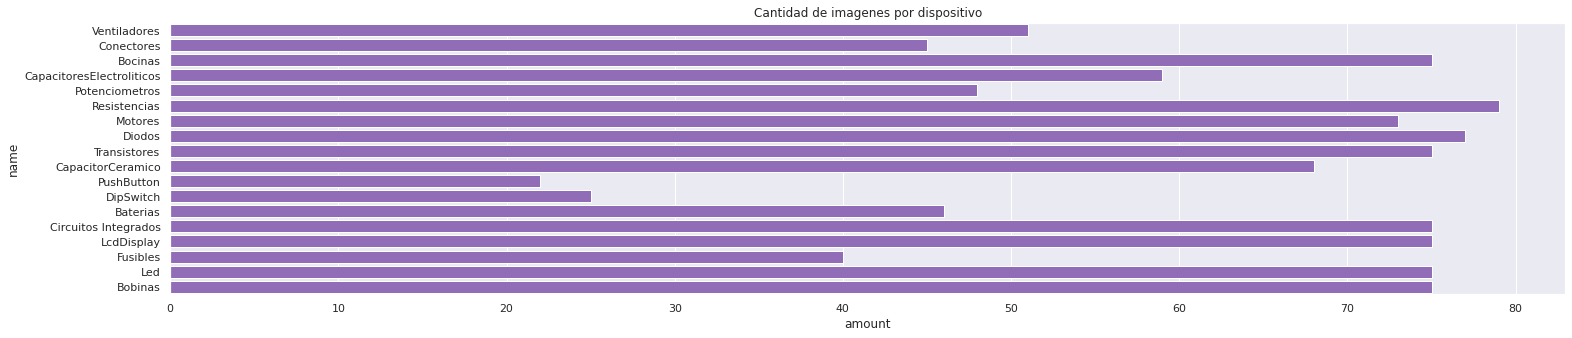

In [13]:

data = {
    'name' : [' '.join(path.split('_')).replace('/', '') for path in listadoComponentesFoto],
    'amount' : amount_images
}

df = pd.DataFrame(data)

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

sns.barplot(
    x = 'amount', 
    y = 'name',
    data = df, 
    estimator = sum, 
    ci = None, 
    color = '#9061C2').set_title('Cantidad de imagenes por dispositivo');

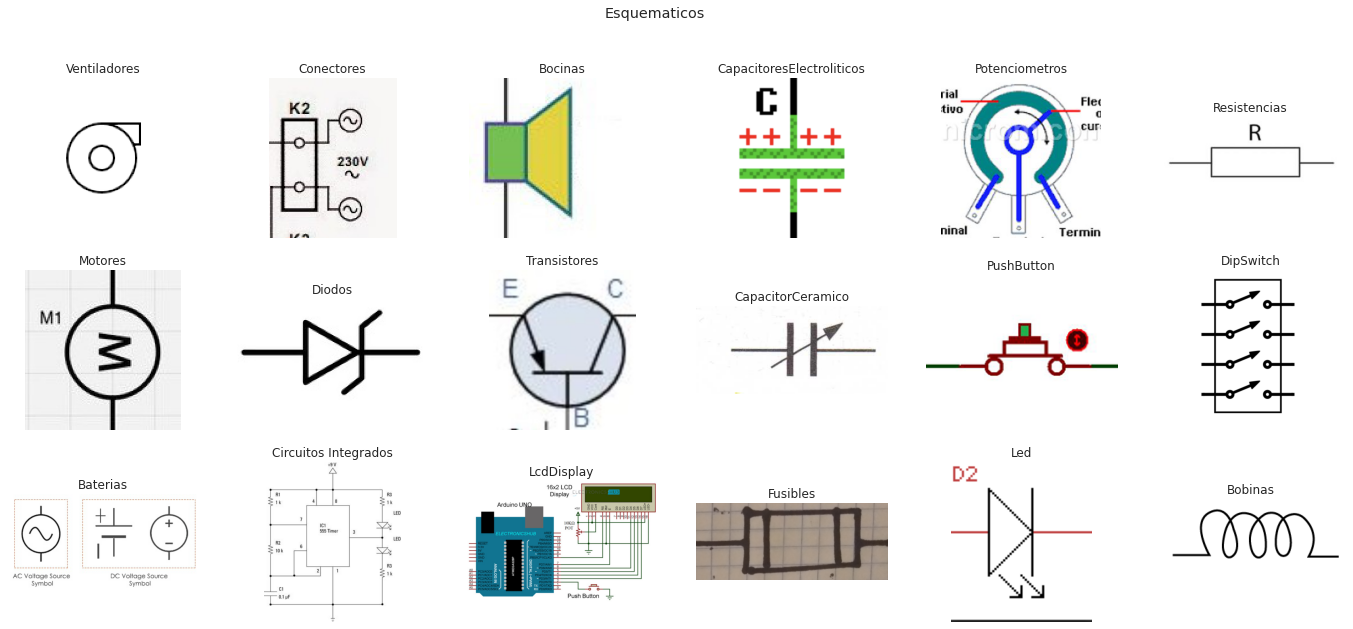

In [14]:
ROWS = 3
COLS = 6
path = 0
amount_images = np.zeros(len(listadoComponentesEsquematico))

fig, ax = plt.subplots(3, 6, figsize = (24, 10))
for i in range(ROWS):
    for j in range(COLS):
        pics = os.listdir(dirData + 'ComponentesEsquematicos/'+ listadoComponentesEsquematico[path])
        amount_images[path] = len(pics)
        index = np.random.randint(len(pics))
        ax[i][j].imshow(Image.open(dirData  + 'ComponentesEsquematicos/'+  listadoComponentesEsquematico[path] + '/' +pics[index]))
        ax[i][j].axis('off')
        ax[i][j].set_title(' '.join(listadoComponentesEsquematico[path].split('_')).replace('/', ''))
        path += 1

        if (path > 17):
            break

fig.suptitle('Esquematicos')

plt.show()

In [15]:
dirData + 'ComponentesFotos/'

'/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/'

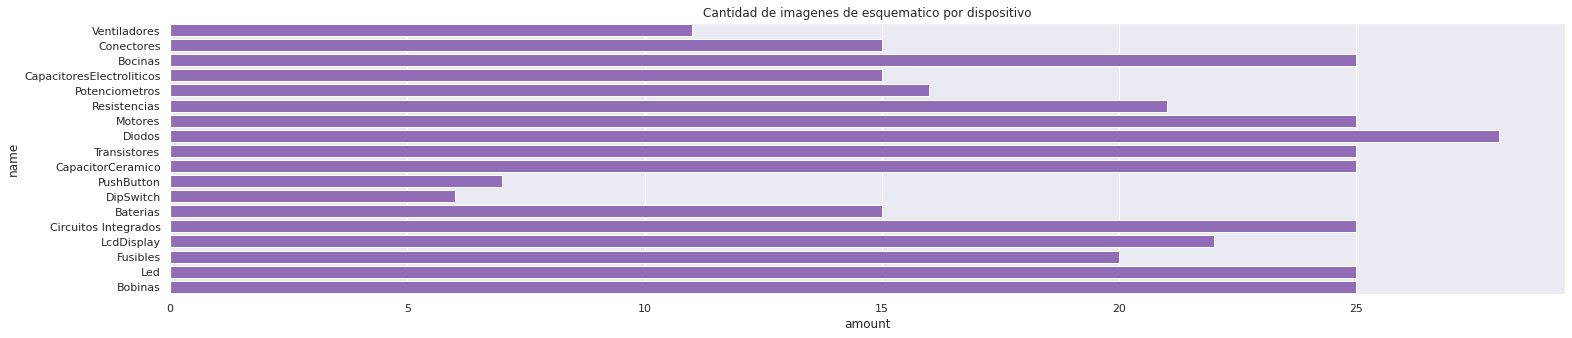

In [16]:
data = {
    'name' : [' '.join(path.split('_')).replace('/', '') for path in listadoComponentesEsquematico],
    'amount' : amount_images
}

df = pd.DataFrame(data)

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

sns.barplot(
    x = 'amount', 
    y = 'name',
    data = df, 
    estimator = sum, 
    ci = None, 
    color = '#9061C2').set_title('Cantidad de imagenes de esquematico por dispositivo');

Como se puede observar nuestrio data set se encuentra relativamente balanceado, aunque tomando en cuenta las diferencias entre fotos y esquematico se ha tomado como opcion separar los esquematicos de los componentes

Primero limpiamos los datos para evitar problemas con archivos que no sean imagenes

In [17]:
def is_image(filename, verbose=False):

    data = open(filename,'rb').read(10)

    # check if file is JPG or JPEG
    if data[:3] == b'\xff\xd8\xff':
        if verbose == True:
             print(filename+" is: JPG/JPEG.")
    else:
      if data[:8] == b'\x89\x50\x4e\x47\x0d\x0a\x1a\x0a':
        if verbose == True:
             print(filename+" is: PNG.")
      else:
        print(filename + ' not is jpg')
      
      
      return True
    return False

In [18]:
for i in range(len(listadoComponentesFoto)):
  files = os.listdir(dirData +'ComponentesFotos/' +listadoComponentesFoto[i])
  
  for j in range(len(files)):
    is_image(dirData +'ComponentesFotos/'+listadoComponentesFoto[i] + '/' + files[j])

/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_87.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_3.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_8.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_9.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_5.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_18.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_15.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Transistores/Transistor2.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Transistores/Transistor3.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/CapacitorC

In [ ]:
dirData

'/content/ProyectoFinalRedesNeuronalesAvanzadas/data/'

In [ ]:
folder = dirData + 'ComponentesFotos/Circuitos Integrados/'
for filename in os.listdir(folder):
     # check if file is actually an image file
     if is_image(folder + filename, verbose=False):
          # if the file is not valid, remove it
          os.remove(folder + filename)

In [19]:
def load_image(filename, path, resize, comp):        
    inimg = tf.cast(tf.image.decode_image(tf.io.read_file(dirData + comp + path + '/' + filename)), tf.float32)[..., :3]/255            

    inimg = tf.image.resize(inimg, (resize, resize))    
    inimg = color.rgb2gray(inimg)
    inimg = inimg[..., np.newaxis]

    return inimg

In [21]:
def PreprocesarData(size,tipo,dispositivos):
  os.chdir(dir)

  try:
    os.chdir( dir+'dataPreprocesada/')  
  except FileNotFoundError:
    os.mkdir( dir+'dataPreprocesada/')
    os.chdir( dir+'dataPreprocesada/')
  
  try:
    os.chdir( dir+'dataPreprocesada/'+tipo)  
  except FileNotFoundError:
    os.mkdir( dir+'dataPreprocesada/'+tipo)
    os.chdir( dir+'dataPreprocesada/'+tipo)
  
  for dispositivo in dispositivos:
    #Por cada tipo realizaremos el número de carpeta correspondiente
    try:
      os.chdir( dir+'dataPreprocesada/'+tipo+'/'+dispositivo)  
    except FileNotFoundError:
      os.mkdir( dir+'dataPreprocesada/'+tipo+'/'+dispositivo)
      os.chdir( dir+'dataPreprocesada/'+tipo+'/'+dispositivo)
    #Con la carpeta destino creada nos movemos a la ubicación de las imagenes

    os.chdir(dir+'data/'+tipo+'/'+dispositivo +'/') #Se supone existe
    print('Actualmente en: ',tipo+', '+dispositivo)
    
    imagenes = os.listdir()
  
    #Acumuladores de datos procesados
    x_v=[]
    y_v=[]
    for imagenName in imagenes:
  
      imagen = Image.open(imagenName)
      imagen2 = imagen.convert('RGB') #Todo a RGB
      
      a,b=imagen2.size
      if a!=b: #Si no coincide el ancho/largo
        if a>b:
          #nuevo fondo
          im = Image.new('RGB', (a, a), (255, 255, 255)) 
          im.paste(imagen2, (0,0))
        else:
          #nuevo fondo
          im = Image.new('RGB', (b, b), (255, 255, 255))
          im.paste(imagen2, (0,0))
      else:
        im = imagen2 #Por si sí es cuadrada

      im = im.resize((size,size))  #Escalar
      
      imagen3 = np.array(im)
      imagen3 = imagen3/255 #Normalizado
      x_v.append(imagen3) 

    y_v.append(dispositivo)
    y_v=y_v*len(x_v) #Número de veces que se debe repetir el target
    x_v=np.array(x_v)
    y_v=np.array(y_v)
  
    os.chdir(dir +'dataPreprocesada/' + tipo + '/'+dispositivo) 
    pickle.dump(x_v, open(dispositivo+"Data", 'wb'))
    pickle.dump(y_v, open(dispositivo+"Target", 'wb'))

In [22]:
PreprocesarData(64, 'ComponentesFotos', listadoComponentesFoto)

Actualmente en:  ComponentesFotos, Ventiladores
Actualmente en:  ComponentesFotos, Conectores
Actualmente en:  ComponentesFotos, Bocinas
Actualmente en:  ComponentesFotos, CapacitoresElectroliticos
Actualmente en:  ComponentesFotos, Potenciometros
Actualmente en:  ComponentesFotos, Resistencias
Actualmente en:  ComponentesFotos, Motores
Actualmente en:  ComponentesFotos, Diodos
Actualmente en:  ComponentesFotos, Transistores
Actualmente en:  ComponentesFotos, CapacitorCeramico
Actualmente en:  ComponentesFotos, PushButton
Actualmente en:  ComponentesFotos, DipSwitch
Actualmente en:  ComponentesFotos, Baterias
Actualmente en:  ComponentesFotos, Circuitos Integrados
Actualmente en:  ComponentesFotos, LcdDisplay
Actualmente en:  ComponentesFotos, Fusibles


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Actualmente en:  ComponentesFotos, Led
Actualmente en:  ComponentesFotos, Bobinas


In [24]:
PreprocesarData(64, 'ComponentesEsquematicos', listadoComponentesEsquematico)

Actualmente en:  ComponentesEsquematicos, Ventiladores
Actualmente en:  ComponentesEsquematicos, Conectores
Actualmente en:  ComponentesEsquematicos, Bocinas
Actualmente en:  ComponentesEsquematicos, CapacitoresElectroliticos
Actualmente en:  ComponentesEsquematicos, Potenciometros
Actualmente en:  ComponentesEsquematicos, Resistencias
Actualmente en:  ComponentesEsquematicos, Motores
Actualmente en:  ComponentesEsquematicos, Diodos
Actualmente en:  ComponentesEsquematicos, Transistores
Actualmente en:  ComponentesEsquematicos, CapacitorCeramico
Actualmente en:  ComponentesEsquematicos, PushButton
Actualmente en:  ComponentesEsquematicos, DipSwitch
Actualmente en:  ComponentesEsquematicos, Baterias
Actualmente en:  ComponentesEsquematicos, Circuitos Integrados


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Actualmente en:  ComponentesEsquematicos, LcdDisplay
Actualmente en:  ComponentesEsquematicos, Fusibles
Actualmente en:  ComponentesEsquematicos, Led
Actualmente en:  ComponentesEsquematicos, Bobinas


In [25]:
!zip -r file.zip /content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/

  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ (stored 0%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/ (stored 0%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Ventiladores/ (stored 0%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Ventiladores/VentiladoresTarget (deflated 93%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Ventiladores/VentiladoresData (deflated 87%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Conectores/ (stored 0%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Conectores/ConectoresTarget (deflated 91%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Conectores/ConectoresData (deflated 88%)
  adding: content/ProyectoFinalRedesNeuronale